In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [14]:
'''
Notebook for the worksheet 4 of the HCIR Lecture
'''

# System imports

# 3rd party imports
from tensorflow import keras
from tensorflow.keras import optimizers
import tensorflow_hub as hub
import pandas as pd
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

# local imports
from utils import Data

# end file header
__author__      = 'Adrian Lubitz'





# Load Models

In [16]:
# Here is an error because of a custom Layer...
#late_model = keras.models.load_model('late_fusion_weights_0.85.hdf5', custom_objects={'KerasLayer': hub.KerasLayer})

In [18]:
early_model = keras.models.load_model('early_fusion_weights_0.92.hdf5', custom_objects={'KerasLayer': hub.KerasLayer})
# early_model.load_weights('early_fusion_weights_0.92.hdf5')
# sgd = optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=False)
# early_model.compile(loss='categorical_crossentropy', 
#               optimizer=sgd, 
#               metrics=['accuracy'])

In [ ]:
text_model = keras.models.load_model('BERT_LSTM_weights_0.84.hdf5', custom_objects={'KerasLayer': hub.KerasLayer})

In [15]:
image_model = keras.models.load_model('inception_model_weights_0.72.hdf5', custom_objects={'KerasLayer': hub.KerasLayer})

# Load Data

In [9]:
d = Data()

print(d.test.shape)
d.test.head()

(22716, 2)


text  \
image_path                                                                     
cup_cakes_468.jpg                                Mini Pineapple Cakes Recipe   
donuts_767.jpg                             Make Simpsons-like Donuts at home   
crab_cakes_426.jpg         Curried Corn and Crab Cakes - Seafood Recipes ...   
hot_and_sour_soup_239.jpg  Hot And Sour Soup Recipe: Ingredients And Dire...   
shrimp_and_grits_477.jpg               Shrimp and Grits | Grabbing the Gusto   

                                        food  
image_path                                    
cup_cakes_468.jpg                  cup_cakes  
donuts_767.jpg                        donuts  
crab_cakes_426.jpg                crab_cakes  
hot_and_sour_soup_239.jpg  hot_and_sour_soup  
shrimp_and_grits_477.jpg    shrimp_and_grits

# Make predictions and calculate accuracy
for the whole dataset and then for each class seperately

In [10]:

data_test = d.tf_data('images/test/*/*.jpg')
data_train = d.tf_data('images/train/*/*.jpg')


ip, op = next(iter(data_test))
images = ip['image'][:16]

input_masks = ip['input_mask'][:16]
input_word_ids = ip['input_word_ids'][:16]
input_segments = ip['segment_ids'][:16]

true_labels =  op['class'][:16]

In [19]:
# Model evaluation on test set
early_model.evaluate(data_test,
               steps = d.test.shape[0]//d.batch_size)

283/283 [==============================] - 666s 2s/step - loss: 23.3658 - accuracy: 7.5088e-04


[23.365785598754883, 0.0007508833659812808]

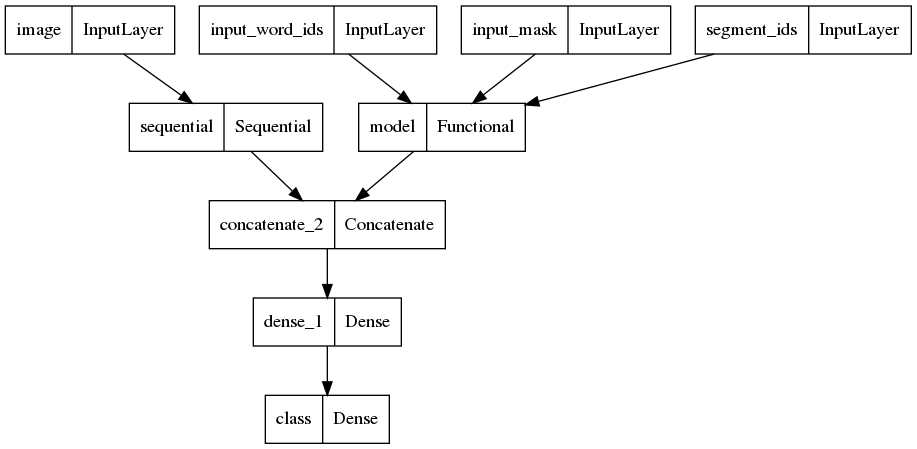

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(early_model, to_file='early_model.png')

In [35]:
pred_labels = early_model.predict([input_word_ids,
                             input_masks,
                             input_segments,
                             images])
print(f'{pred_labels=}')                             

1/1 [==============================] - 0s 481ms/step
pred_labels=array([[6.3254948e-09, 3.1143018e-06, 4.4871442e-08, ..., 7.6442973e-08,
        3.1189668e-07, 1.8112809e-07],
       [9.5157750e-11, 4.8161863e-10, 5.1156773e-10, ..., 1.6572335e-12,
        1.4584398e-11, 1.7568732e-08],
       [1.3994844e-08, 1.2682029e-08, 2.1559026e-07, ..., 4.4550152e-08,
        1.0897067e-04, 9.5567077e-07],
       ...,
       [1.1026049e-04, 4.8143932e-07, 1.3735614e-13, ..., 1.6030713e-09,
        1.4015412e-11, 8.4291754e-11],
       [4.2834799e-06, 2.9495810e-05, 1.0643281e-01, ..., 2.0214054e-06,
        5.1188552e-05, 5.2365460e-03],
       [2.1217285e-11, 3.0133793e-09, 1.4161816e-12, ..., 7.2104065e-09,
        1.8734486e-10, 6.8233759e-11]], dtype=float32)


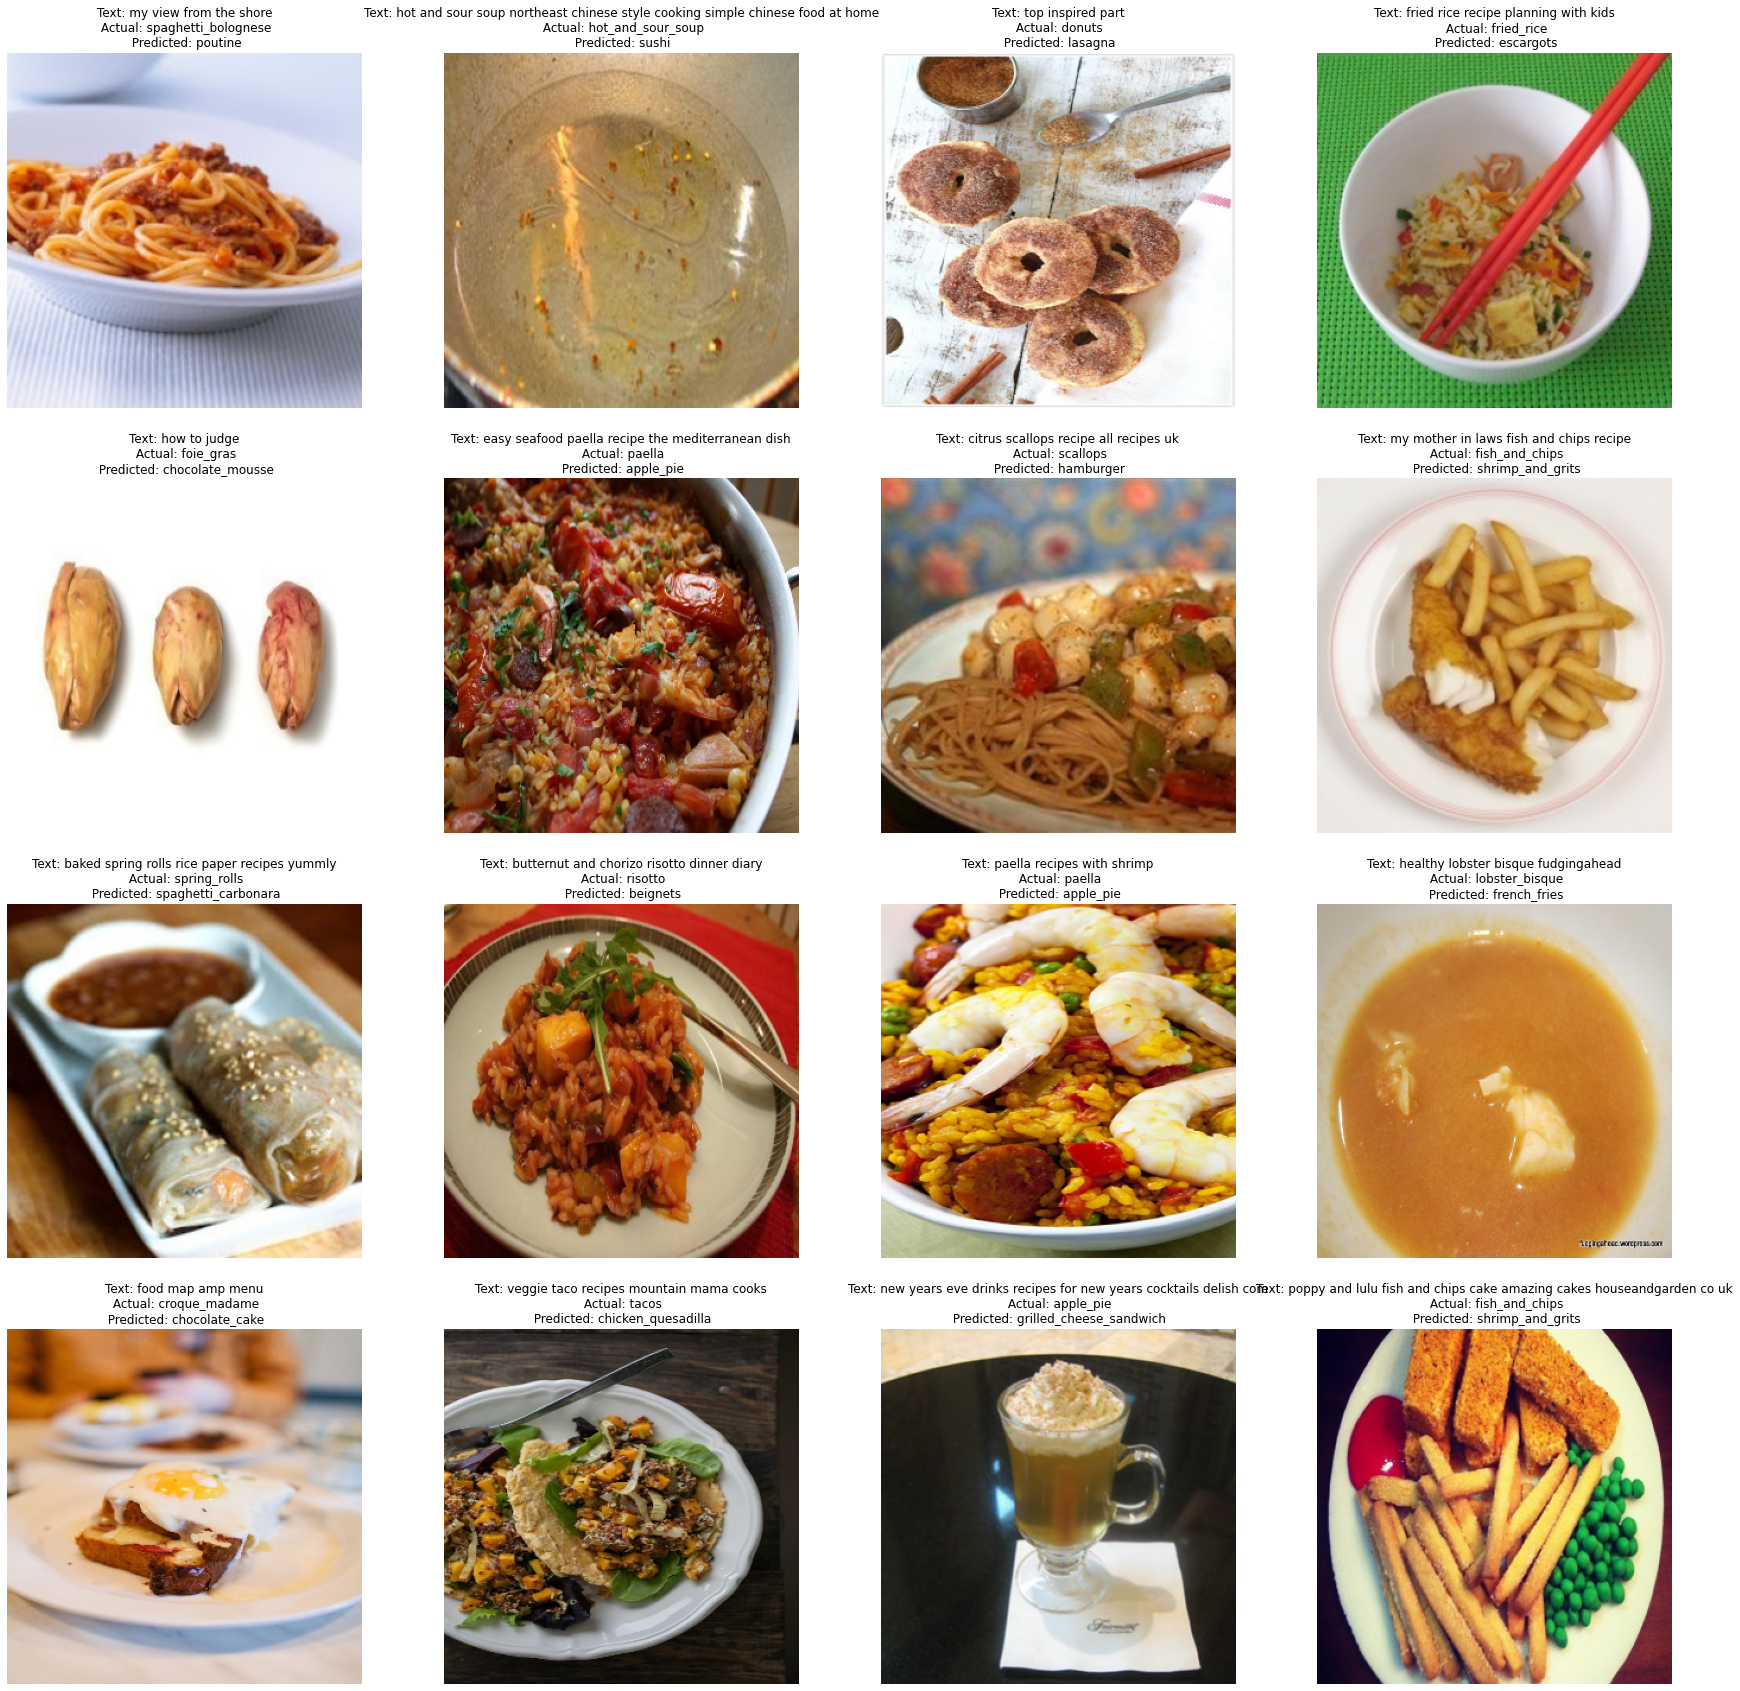

len(true_labels)=16


In [38]:
i=1
texts = [d.clean_text(array) for array in input_word_ids.numpy()[:16]]
plt.figure(figsize=(30,30))
correct_classifications = 0
for image, actual_label, label, text in zip(images.numpy()[:16], true_labels.numpy()[:16], pred_labels, texts):
      # print(f'{d.Classes[actual_label.argmax(0)]=}')
      # print(f'{d.Classes[label.argmax(0)]=}')
      # if d.Classes[actual_label.argmax(0)] == d.Classes[label.argmax(0)]:
      #       print('Yeah')
      #       correct_classifications += 1

      plt.subplot(4,4,i)
      i+=1
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      plt.imshow(image)
      plt.axis('off')
      plt.title("Text: {}\n Actual: {}\n Predicted: {}".format(text, d.Classes[actual_label.argmax(0)], d.Classes[label.argmax(0)]))
      plt.xlabel(text)
plt.show()
# acurracy = float(correct_classifications) / len(true_labels)
# print(f'{acurracy=}')
print(f'{len(true_labels)=}')